In [6]:
#muss man halt einmal runterladen: https://github.com/openskynetwork/opensky-api
#pip install -e /Users/jonaspieper/Documents/GitHub/opensky-api/python

Obtaining file:///Users/jonaspieper/Documents/GitHub/opensky-api/python
  Preparing metadata (setup.py) ... done
  Running setup.py develop for opensky-api
Note: you may need to restart the kernel to use updated packages.


In [3]:
#from opensky_api import OpenSkyApi
import pandas as pd
#from geopy.geocoders import Nominatim
import requests
#import json

# OpenSkyApi

[Limitations](https://github.com/openskynetwork/opensky-api/blob/master/docs/free/rest.rst#id5)

In [55]:
#call opensky network api as unnkown users
response = requests.get("https://opensky-network.org/api/states/all").json()

## Save as json

In [81]:
# Save as .json with timestamp as name
with open(f'{response["time"]}.json', 'w', encoding='utf-8') as f:
    json.dump(response, f, ensure_ascii=False, indent=4)

In [82]:
# Open json
with open('1652785860.json') as f:
    test = json.load(f)

## Turn into DataFrame and filter for flight from commercial airlines

In [84]:
flights_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,4b1814,SWR1742,Switzerland,1.652786e+09,1652785859,10.1742,42.7007,11277.60,False,257.77,154.97,-0.33,None,11658.60,1000,False,0,0
1,4b1816,SWR101C,Switzerland,1.652786e+09,1652785859,8.4964,47.4620,1158.24,False,76.64,276.55,13.98,None,1303.02,1000,False,0,0
2,7c6b2f,JST825,Australia,1.652786e+09,1652785860,152.7774,-28.4210,7711.44,False,224.50,201.51,10.08,None,8069.58,None,False,0,0
3,7c6b2d,JST712,Australia,1.652786e+09,1652785859,146.9922,-41.1352,11521.44,False,202.81,337.79,7.80,None,11376.66,3762,False,0,1
4,4b1812,SWR167M,Switzerland,1.652786e+09,1652785859,9.3810,48.6905,10805.16,False,210.79,10.40,6.50,None,11148.06,3042,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5784,710dbc,KNE308,Saudi Arabia,1.652786e+09,1652785860,16.7209,45.6714,11894.82,False,236.35,132.27,0.00,None,12176.76,7104,False,0,0
5785,4caa32,ITY614,Ireland,1.652786e+09,1652785859,-14.6934,52.8661,11178.54,False,262.19,306.06,1.95,None,11079.48,4040,False,0,6
5786,a9607d,JBU329,United States,1.652786e+09,1652785860,-79.3692,36.7145,10363.20,False,215.97,216.38,0.33,None,10660.38,5343,False,0,4
5787,c067ae,ACA400,Canada,1.652786e+09,1652785855,-79.6201,43.6774,NaN,False,7.46,137.81,NaN,None,NaN,2252,False,0,0


In [91]:
flights_df = pd.DataFrame(response["states"]).loc[:,:16]
col_names=['icao24','callsign','origin_country','time_position','last_contact','long','lat','baro_altitude','on_ground','velocity',       
'true_track','vertical_rate','sensors','geo_altitude','squawk','spi','position_source']
flights_df.columns = col_names

In [107]:
flights_df.head(5)

,icao24,callsign,origin_country,time_position,last_contact,long,lat,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
0,4b1814,SWR1742,Switzerland,1.652787e+09,1652787428,12.1478,39.4023,7703.82,False,242.31,156.21,-10.40,None,8420.10,1000,False,0
1,e49406,GLO1288,Brazil,1.652787e+09,1652787439,-46.0509,-23.2422,5181.60,False,180.70,10.83,0.00,None,5334.00,None,False,0
2,4b1816,SWR101C,Switzerland,1.652787e+09,1652787440,9.3290,49.8667,10363.20,False,205.30,337.61,-0.33,None,10690.86,1000,False,0
3,7c6b2f,JST825,Australia,1.652787e+09,1652787440,151.4894,-31.2249,10355.58,False,215.71,202.28,0.00,None,10690.86,1020,False,0
4,7c6b2d,JST712,Australia,1.652787e+09,1652787440,145.6546,-38.5350,7178.04,False,176.55,338.82,-10.73,None,7200.90,3762,False,0


In [286]:
# Store as .csv
#flights_df.to_csv("../raw_data/flights_raw.csv")

## Airlines and callsigns

In [1]:
wikiurl = "https://de.wikipedia.org/wiki/Liste_von_Fluggesellschaften"

In [6]:
carriers_df = pd.DataFrame(pd.read_html(wikiurl, keep_default_na=False)[1])
carriers_df.head()

,Name,IATA,ICAO,Rufzeichen,Herkunftsland,Luftfahrtallianz,Bemerkung
0,ABC Air Hungary,–,AHU,ABC HUNGARY,Ungarn,,T
1,Abelag Aviation,W9,AAB,ABG,Belgien,,C (Business- u. Ambulanzflüge)
2,ABS Jets,–,ABP,BAIR,Tschechien,,P
3,Abu Dhabi Aviation,–,AXU,–,VAE,,C
4,ABX Air,GB,ABX,ABEX,USA,,T+


B: Billigfluggesellschaft<br>
C: Charterfluggesellschaft<br>
P: Passagierfluggesellschaft mit Linienflügen und ggf. einigen Charterflügen<br>
P+: Passagier- und Charterfluggesellschaft<br>
R: führt Regierungsflüge durch<br>
S: Sonstige Flüge, wie z. B. medizinische Dienste oder Nostalgieflüge<br>
T: Transportfluggesellschaft<br>
T+: Transport- und Charterfluggesellschaft<br>
U: Universal; Passagier sowie Fracht<br>
U+: Charter-, Passagier- und Transportfluggesellschaft<br>
Wenn eine genaue Einordnung nicht möglich ist → P<br>

ICAO Code == first three letters of callsign 

In [108]:
carriers_df.Bemerkung.value_counts()

P                                                     385
C                                                      86
B                                                      67
T                                                      61
P+                                                     56
U                                                      32
T+                                                     20
U+                                                     12
S                                                       4
R                                                       3
B/C                                                     2
P/R                                                     2
C/R                                                     2
T+ (auch Ambulanzflüge)                                 2
C/S/T                                                   1
Airtaxi                                                 1
Übungsflüge                                             1
S (Nostalgiefl

In [109]:
# Filter wikipedia table for passenger carriers
car_types = ["B", "C", "P", "P+", "U", "U+"]

In [114]:
p_carriers = carriers_df[carriers_df["Bemerkung"].isin(car_types)]

In [116]:
p_carriers.ICAO

2      ABP
3      AXU
5      BVR
7      AEE
8      REA
      ... 
746    ANR
747    IYE
748      –
749    IZG
750    TAN
Name: ICAO, Length: 638, dtype: object

In [162]:
# Filter flights only to include passenger flights
pflights_df = flights_df[flights_df.callsign.str[:3].isin(p_carriers.ICAO)].copy()
pflights_df

,icao24,callsign,origin_country,time_position,last_contact,long,lat,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
0,4b1814,SWR1742,Switzerland,1.652787e+09,1652787428,12.1478,39.4023,7703.82,False,242.31,156.21,-10.40,None,8420.10,1000,False,0
1,e49406,GLO1288,Brazil,1.652787e+09,1652787439,-46.0509,-23.2422,5181.60,False,180.70,10.83,0.00,None,5334.00,None,False,0
2,4b1816,SWR101C,Switzerland,1.652787e+09,1652787440,9.3290,49.8667,10363.20,False,205.30,337.61,-0.33,None,10690.86,1000,False,0
3,7c6b2f,JST825,Australia,1.652787e+09,1652787440,151.4894,-31.2249,10355.58,False,215.71,202.28,0.00,None,10690.86,1020,False,0
4,7c6b2d,JST712,Australia,1.652787e+09,1652787440,145.6546,-38.5350,7178.04,False,176.55,338.82,-10.73,None,7200.90,3762,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,4b1900,,Switzerland,NaN,1652787427,NaN,NaN,NaN,False,267.07,79.23,0.00,None,NaN,None,False,0
6233,4b1901,EDW3A,Switzerland,1.652787e+09,1652787440,-12.8410,53.6476,11887.20,False,228.25,106.23,0.00,None,11879.58,None,False,0
6235,a9607d,JBU329,United States,1.652787e+09,1652787384,-80.8710,33.9732,10363.20,False,221.96,199.78,0.00,None,10736.58,5343,False,0
6236,c067ae,ACA400,Canada,1.652787e+09,1652787440,-77.2889,44.1448,10058.40,False,225.46,57.11,0.00,None,9928.86,2252,False,0


In [163]:
pflights_df["callsign_carrier"] = pflights_df["callsign"].str[:3]

In [164]:
p_carriers

,Name,IATA,ICAO,Rufzeichen,Herkunftsland,Luftfahrtallianz,Bemerkung
2,ABS Jets,–,ABP,BAIR,Tschechien,,P
3,Abu Dhabi Aviation,–,AXU,–,VAE,,C
5,ACM Air Charter,–,BVR,BAVARIAN,Deutschland,AirClub,C
7,Aegean Airlines,A3,AEE,AEGEAN,Griechenland,Star Alliance,P
8,Aer Arann Islands,RE,REA,AER ARANN,Irland,,P+
...,...,...,...,...,...,...,...
746,Yanair,YE,ANR,YANAIR,Ukraine,keine,P
747,Yemenia,IY,IYE,Yemeni,Jemen,keine,P
748,Yeti Airlines,YA,–,–,Nepal,keine,U+
749,Zagros Airlines,–,IZG,ZAGROS,Iran,keine,P


In [166]:
# merge carrier to df
pflights_df = pflights_df.merge(p_carriers[["Name", "ICAO"]], left_on="callsign_carrier", right_on="ICAO", how="left")
pflights_df.rename(columns = {'Name':'carrier_company', "ICAO":"icao"}, inplace = True)
pflights_df.head()

,icao24,callsign,origin_country,time_position,last_contact,long,lat,baro_altitude,on_ground,velocity,...,sensors,geo_altitude,squawk,spi,position_source,callsign_carrier,carrier_company,icao,carrier_company,icao
0,4b1814,SWR1742,Switzerland,1.652787e+09,1652787428,12.1478,39.4023,7703.82,False,242.31,...,None,8420.10,1000,False,0,SWR,Swiss,SWR,Swiss,SWR
1,e49406,GLO1288,Brazil,1.652787e+09,1652787439,-46.0509,-23.2422,5181.60,False,180.70,...,None,5334.00,None,False,0,GLO,Gol Linhas Aéreas,GLO,Gol Linhas Aéreas,GLO
2,4b1816,SWR101C,Switzerland,1.652787e+09,1652787440,9.3290,49.8667,10363.20,False,205.30,...,None,10690.86,1000,False,0,SWR,Swiss,SWR,Swiss,SWR
3,7c6b2f,JST825,Australia,1.652787e+09,1652787440,151.4894,-31.2249,10355.58,False,215.71,...,None,10690.86,1020,False,0,JST,Jetstar Airways,JST,Jetstar Airways,JST
4,7c6b2d,JST712,Australia,1.652787e+09,1652787440,145.6546,-38.5350,7178.04,False,176.55,...,None,7200.90,3762,False,0,JST,Jetstar Airways,JST,Jetstar Airways,JST


In [130]:
# Check validity of on_ground against altitude
pflights_df[(pflights_df.on_ground==True)& (pflights_df.baro_altitude>1000)]

,icao24,callsign,origin_country,time_position,last_contact,long,lat,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
2041,4baa8a,THY9WM,Turkey,1.652787e+09,1652787441,14.6591,51.0408,9151.62,True,197.03,342.37,-10.4,None,9334.5,3205,False,0


In [131]:
# Check validity of on_ground against altitude
pflights_df[(pflights_df.on_ground==True)& (pflights_df.geo_altitude>1000)]

,icao24,callsign,origin_country,time_position,last_contact,long,lat,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
2041,4baa8a,THY9WM,Turkey,1.652787e+09,1652787441,14.6591,51.0408,9151.62,True,197.03,342.37,-10.4,None,9334.5,3205,False,0


In [285]:
# Store as .csv
#pflights_df.to_csv("../raw_data/pflights.csv")

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

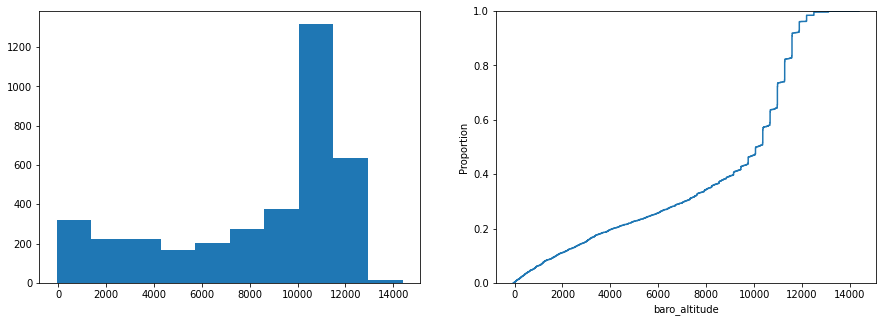

In [146]:
# Check distribution of baro_altitude
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].hist(pflights_df.baro_altitude)
sns.ecdfplot(pflights_df.baro_altitude, ax=axs[1]);

## Aircraft types

### US Aircrafts

[US Aircraft registration DB](https://www.faa.gov/licenses_certificates/aircraft_certification/aircraft_registry/releasable_aircraft_download/)

In [255]:
# Load data (I downloaded it to my machine first)
acftref = pd.read_csv("/Users/philippheitmann/Downloads/ReleasableAircraft/ACFTREF.txt")
mastr = pd.read_csv("/Users/philippheitmann/Downloads/ReleasableAircraft/MASTER.txt")

/Users/philippheitmann/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [256]:
# Columns to keep
col = ["MODE S CODE HEX", "MODE S CODE", "TYPE AIRCRAFT", 'CODE', "NAME", 'MFR', 'MODEL', 'TYPE-ACFT', 'NO-SEATS']

# Merge two tables
aircraft_US = mastr.merge(acftref, left_on="MFR MDL CODE", right_on="CODE")[col].copy()

In [278]:
# strip whitespace
cols = aircraft_US.select_dtypes(object).columns
aircraft_US[cols] = aircraft_US[cols].apply(lambda x: x.str.strip())

In [279]:
# Create column to merge on (lowercase)
aircraft_US["icao24"] = aircraft_US["MODE S CODE HEX"].str.lower()

In [282]:
# Merge dataframes to get Aircraft model and no of seats for american registered airlines 
us_pflights = pflights_df.merge(aircraft_US, on="icao24", how="inner")

In [284]:
# Store as .csv
#us_pflights.to_csv("../raw_data/us_pflights.csv")

In [295]:
pflights_df[pflights_df.origin_country=="Chile"]

,icao24,callsign,origin_country,time_position,last_contact,long,lat,baro_altitude,on_ground,velocity,...,sensors,geo_altitude,squawk,spi,position_source,callsign_carrier,carrier_company,icao,carrier_company,icao
72,e80261,,Chile,1.652787e+09,1652787440,-78.3850,-0.0081,3634.74,False,135.81,...,None,3855.72,None,False,0,,FlyMontserrat,,FlyMontserrat,
73,e80261,,Chile,1.652787e+09,1652787440,-78.3850,-0.0081,3634.74,False,135.81,...,None,3855.72,None,False,0,,FlyMontserrat,,Lulutai Airlines,
74,e80261,,Chile,1.652787e+09,1652787440,-78.3850,-0.0081,3634.74,False,135.81,...,None,3855.72,None,False,0,,Lulutai Airlines,,FlyMontserrat,
75,e80261,,Chile,1.652787e+09,1652787440,-78.3850,-0.0081,3634.74,False,135.81,...,None,3855.72,None,False,0,,Lulutai Airlines,,Lulutai Airlines,
77,e80269,LPE2436,Chile,1.652787e+09,1652787440,-76.7329,-12.7780,7170.42,False,203.61,...,None,7673.34,None,False,0,LPE,LATAM Airlines Perú,LPE,LATAM Airlines Perú,LPE
82,e80278,LPE2005,Chile,1.652787e+09,1652787440,-77.0650,-12.1121,1173.48,False,111.96,...,None,1234.44,None,False,0,LPE,LATAM Airlines Perú,LPE,LATAM Airlines Perú,LPE
1340,e80600,JAT700,Chile,1.652787e+09,1652787155,-56.8628,-34.6975,4762.50,False,141.29,...,None,4800.60,5327,False,0,JAT,JetSmart,JAT,JetSmart,JAT
1794,e80459,TAM8180,Chile,1.652787e+09,1652787439,-73.5007,40.4777,944.88,False,133.70,...,None,891.54,6072,False,0,TAM,LATAM Airlines Brasil,TAM,LATAM Airlines Brasil,TAM
1845,e8040c,LPE2380,Chile,NaN,1652787345,NaN,NaN,NaN,False,239.82,...,None,NaN,None,False,0,LPE,LATAM Airlines Perú,LPE,LATAM Airlines Perú,LPE
1847,e80422,LAN1286,Chile,1.652787e+09,1652787396,-80.2667,25.7881,45.72,False,78.24,...,None,53.34,None,False,0,LAN,LATAM Airlines,LAN,LATAM Airlines,LAN


### Further Aircraft registers
- [List](https://www.caa.co.uk/aircraft-register/g-info/other-data-sources/)
- [This one would solve a lot of our problems, but unfortunately it is not available](http://www.airframes.org/)

## Convert time into datetime

In [289]:
from datetime import datetime

In [287]:
# Timestamp in Unix since epoch
response["time"]

1652787441

In [290]:
# Unix time as datetime
datetime.fromtimestamp(response["time"])

datetime.datetime(2022, 5, 17, 13, 37, 21)

## Address based on lat & long

### Geolocator - Find address based on lat & long

In [2]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [13]:
landing["lat_long"]=landing['lat'].astype("string")+","+landing['long'].astype("string")

/var/folders/r8/ml9zphbs05z5wx9ykw9g7r_40000gn/T/ipykernel_4081/3222059204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  landing["lat_long"]=landing['lat'].astype("string")+","+landing['long'].astype("string")


In [16]:
landing["address"] = landing.apply(lambda col: geolocator.reverse(col["lat_long"], language="en-GB", addressdetails=False), axis=1)

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=41.3392&lon=2.2019&format=json&accept-language=en-GB&addressdetails=0 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [ ]:
landing =  landing.dropna()

In [ ]:
landing["country"] = landing.apply(lambda col: col["address"][0].split(",")[-1], axis=1)

### Traffic tool?

In [22]:
import matplotlib.pyplot as plt
from traffic.data import opensky
from traffic.drawing import EuroPP, countries
sv = opensky.api_states()
df = sv.data.head
print(df)

ModuleNotFoundError: No module named 'traffic'